Training ANN is often performed using mini-batch SGD. PyTorch offers ready to use functions to split your data into mini-batches for training. 

Here is a silly example

Text(0, 0.5, 'y')

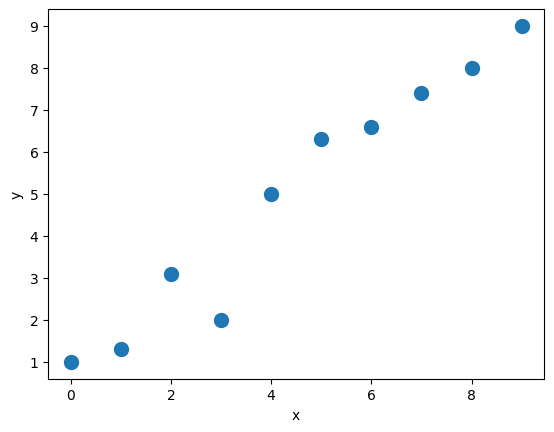

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

X_train = np.arange(10,dtype = float).reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

In [20]:
X_train = np.arange(10,dtype = 'float32').reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')


#normalize the data 
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

#conver numpy arrays to PyTorch tensors 
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)

#create a TensorDataset 
train_dataset = torch.utils.data.TensorDataset(X_train_norm, y_train)

batch_size =  1
#pass the DataSet to a DataLoader with the desired number of elements per batch 
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle= True)



In [21]:
class LinearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(LinearRegression, self).__init__()
        
        #this is how you define a linear system in pytorch
        self.linear = torch.nn.Linear(inputSize, outputSize, bias=True)

    #the forward methds defines the data flow
    def forward(self, x):
        out =self.linear(x)
        return out

loss_fn = torch.nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
# model = torch.nn.Linear(input_size, output_size)
model = LinearRegression(input_size, output_size)
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


num_epochs = 300
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dataloader:
        
        #1. Generate predictions
        pred = model(x_batch)
        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)
        # 3. Compute gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}, bias {model.linear.bias.detach().item():.4f}, coeff {model.linear.weight.detach().item():.4f}')
        #print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 2.2122, bias -0.3214, coeff -0.1161
Epoch 10 Loss 2.4707, bias 0.6395, coeff 0.3970
Epoch 20 Loss 13.8680, bias 1.4259, coeff 0.8169
Epoch 30 Loss 15.4809, bias 2.0696, coeff 1.1601
Epoch 40 Loss 17.4264, bias 2.5963, coeff 1.4413
Epoch 50 Loss 8.7072, bias 3.0274, coeff 1.6713
Epoch 60 Loss 1.8034, bias 3.3802, coeff 1.8594
Epoch 70 Loss 5.2227, bias 3.6689, coeff 2.0133
Epoch 80 Loss 2.6846, bias 3.9051, coeff 2.1394
Epoch 90 Loss 1.9539, bias 4.0984, coeff 2.2426
Epoch 100 Loss 1.0901, bias 4.2566, coeff 2.3269
Epoch 110 Loss 1.2947, bias 4.3862, coeff 2.3959
Epoch 120 Loss 1.9148, bias 4.4922, coeff 2.4524
Epoch 130 Loss 0.1431, bias 4.5790, coeff 2.4986
Epoch 140 Loss 0.1064, bias 4.6499, coeff 2.5364
Epoch 150 Loss 0.0270, bias 4.7080, coeff 2.5673
Epoch 160 Loss 0.1513, bias 4.7557, coeff 2.5927
Epoch 170 Loss 1.1080, bias 4.7946, coeff 2.6134
Epoch 180 Loss 0.4004, bias 4.8264, coeff 2.6303
Epoch 190 Loss 0.1351, bias 4.8525, coeff 2.6442
Epoch 200 Loss 0.0834, bia

Text(0, 0.5, 'y')

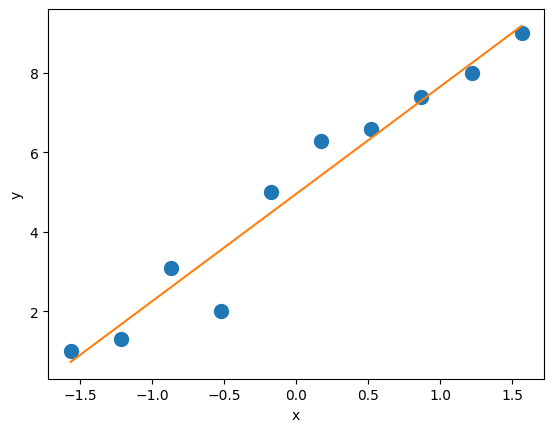

In [22]:
X_train = np.arange(10,dtype = float).reshape((10))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,7.4, 8.0,9.0], dtype='float32')
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_train_norm, X_train_norm*model.linear.weight.detach().item() + model.linear.bias.detach().item())
plt.xlabel('x')
plt.ylabel('y')

## Example 2

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)


X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train).long()

train_ds = torch.utils.data.TensorDataset(X_train_norm, y_train)
torch.manual_seed(1)
batch_size = 10
train_dl = torch.utils.data.DataLoader(train_ds, batch_size, shuffle=True)


X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test).long()

In [24]:
import torch.nn as nn 

class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
#         self.nonlin = nn.Sigmoid()
        self.nonlin = nn.ReLU()
 
    def forward(self, x):
        x = self.layer1(x)
        x = self.nonlin(x)
        x = self.layer2(x)
        return x

In [29]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 200
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

loss_test_hist = [0] * num_epochs
accuracy_test_hist = [0] * num_epochs


for epoch in range(num_epochs):
    model.train() #set the model for training
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)
    
    
    #compute the testing accuracy 
    with torch.no_grad():
        model.eval() #set the model for evaluation 
        pred_test = model(X_test_norm)

        correct = (torch.argmax(pred_test, dim=1) == y_test).float()
        accuracy_test_hist[epoch] = correct.mean()

        loss_test = loss_fn(pred_test, y_test)
        loss_test_hist[epoch] = loss_test.item()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss Train {loss_hist[epoch]:.4f}, Acc Train {accuracy_hist[epoch]:.4f} Loss Test {loss_test_hist[epoch]:.4f}')

Epoch 0 Loss Train 1.1636, Acc Train 0.3300 Loss Test 1.1162
Epoch 10 Loss Train 0.8586, Acc Train 0.7200 Loss Test 0.8457
Epoch 20 Loss Train 0.6473, Acc Train 0.7900 Loss Test 0.6466
Epoch 30 Loss Train 0.5031, Acc Train 0.8800 Loss Test 0.5024
Epoch 40 Loss Train 0.4123, Acc Train 0.9000 Loss Test 0.4114
Epoch 50 Loss Train 0.3499, Acc Train 0.9100 Loss Test 0.3482
Epoch 60 Loss Train 0.3033, Acc Train 0.9200 Loss Test 0.3002
Epoch 70 Loss Train 0.2679, Acc Train 0.9600 Loss Test 0.2592
Epoch 80 Loss Train 0.2395, Acc Train 0.9600 Loss Test 0.2281
Epoch 90 Loss Train 0.2174, Acc Train 0.9600 Loss Test 0.2018
Epoch 100 Loss Train 0.1980, Acc Train 0.9600 Loss Test 0.1819
Epoch 110 Loss Train 0.1828, Acc Train 0.9600 Loss Test 0.1677
Epoch 120 Loss Train 0.1697, Acc Train 0.9600 Loss Test 0.1516
Epoch 130 Loss Train 0.1600, Acc Train 0.9600 Loss Test 0.1358
Epoch 140 Loss Train 0.1497, Acc Train 0.9600 Loss Test 0.1292
Epoch 150 Loss Train 0.1419, Acc Train 0.9700 Loss Test 0.1169
Epo

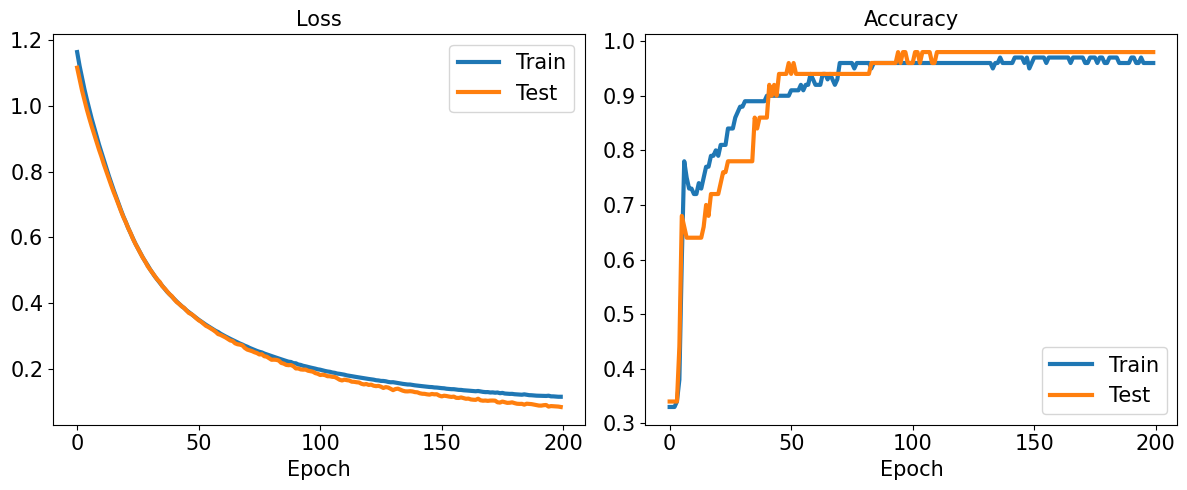

In [30]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3, label='Train')
ax.plot(loss_test_hist, lw=3, label='Test')
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3, label='Train')
ax.plot(accuracy_test_hist, lw=3, label='Test')
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.tight_layout()

plt.show()

### A more complex example

MNIST dataset is a dataset composed of hundreds of images of handwritten digits. The images have been digitalized and converted to black and white. 


In [31]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%
2.0%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



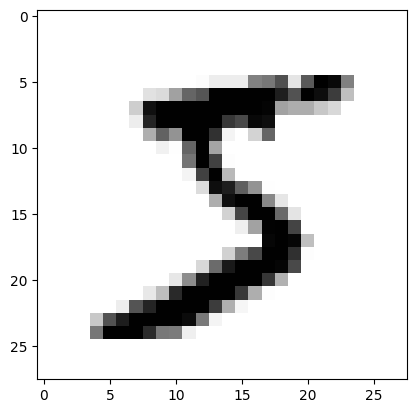

In [36]:
img, label  = mnist_trainset[0]
plt.imshow(img, cmap='binary')

In [38]:
print(label)

6


In [39]:
print(img.size)

(28, 28)


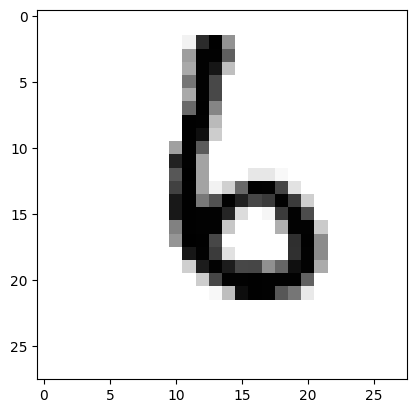

In [40]:
img, label  = mnist_trainset[1520]
plt.imshow(img, cmap='binary')

In [41]:
print(label)

6


In [42]:
print(img.size)

(28, 28)


We need to create a DataSet that can load this data. The standard ```TensorDataSet``` cannot be used because the data comes in pairs (and image and a label), so we need to create a custom dataset

To do that, we are going to create a class that inherits from Dataset


In [43]:
#the class must have three methods:

# __init__ -> defines the components
# __getitem__ -> defines the logic to get the data
#__len__ -> simply returns the length of the dataset

class DatasetTransformer(torch.utils.data.Dataset):

    def __init__(self, data, transform):
        self.data= data
        self.transform = transform

    def __getitem__(self, index):
        #get the image and the label
        img, label= self.data[index]
        return self.transform(img), label

    def __len__(self):
        return len(self.data)


In [44]:
import torchvision.transforms as transforms

#we are going to transform the image into a pytorch tensor
train_dataset_full = DatasetTransformer(mnist_trainset, transforms.ToTensor())
test_dataset  = DatasetTransformer(mnist_testset, transforms.ToTensor())

In [45]:
#take a small sample of data
import random
idx = list(range(len(train_dataset)))
random.shuffle(idx)
train_dataset = torch.utils.data.Subset(train_dataset_full, idx[0:1000])

In [46]:
#mow you can create the DataLoaders with a specific batchsize

batch_size  = 128   # Using minibatches of 128 samples

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

In [47]:
data_from_loader = next(iter(train_loader))

In [48]:
data_from_loader[0].size()

torch.Size([10, 1, 28, 28])

In [49]:
print(data_from_loader[0][0].size(), data_from_loader[1][0].item())

print(data_from_loader[0][1].size(), data_from_loader[1][1].item())

print(data_from_loader[0][127].size(), data_from_loader[1][127].item())

torch.Size([1, 28, 28]) 1
torch.Size([1, 28, 28]) 1


IndexError: index 127 is out of bounds for dimension 0 with size 10

In [50]:
print(data_from_loader[0][128].size(), data_from_loader[1][128].item())

IndexError: index 128 is out of bounds for dimension 0 with size 10

In [51]:
class LinearNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LinearNet, self).__init__()
        self.input_size = input_size
        self.classifier = nn.Linear(self.input_size, num_classes)

    def forward(self, x):
        #make the image into a long vector
        x = x.view(x.size()[0], -1)
        y = self.classifier(x)
        return y

model = LinearNet(1*28*28, 10)

In [52]:
#check if the model works
out = model(data_from_loader[0])
print(out.size())

torch.Size([10, 10])


In [53]:
learning_rate = 0.01

loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

num_epochs = 30
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

loss_test_hist = [0] * num_epochs
accuracy_test_hist = [0] * num_epochs

log_epochs=5

for epoch in range(num_epochs):
    model.train() #set the model for training
    for x_batch, y_batch in train_loader:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        predicted_targets = torch.argmax(pred, dim=1)
        accuracy_hist[epoch] += (predicted_targets == y_batch).sum().item()
        
    loss_hist[epoch] /= len(train_loader.dataset)
    accuracy_hist[epoch] /= len(train_loader.dataset)
    
    
    #compute the testing accuracy 
    with torch.no_grad():
        model.eval() #set the model for evaluation 
        for x_batch, y_batch in test_loader:
            pred_test = model(x_batch)

            predicted_targets = torch.argmax(pred_test, dim=1)
            accuracy_test_hist[epoch] += (predicted_targets == y_batch).sum().item()

            loss_test = loss_fn(pred_test, y_batch)
            loss_test_hist[epoch] += loss.item()*y_batch.size(0)
        
        accuracy_test_hist[epoch] /= len(test_loader.dataset)
        loss_test_hist[epoch] /= len(test_loader.dataset)
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss_hist[epoch]:.8f}, accuracy  {accuracy_hist[epoch]:0.4f}')
        print(f'        test-Loss {loss_test_hist[epoch]:.8f}, test-accuracy  {accuracy_test_hist[epoch]:0.4f}')

Epoch 0 Loss 2.28012609, accuracy  0.1000
        test-Loss 2.28012609, test-accuracy  0.3560
Epoch 5 Loss 0.11118655, accuracy  1.0000
        test-Loss 0.11118655, test-accuracy  0.3943
Epoch 10 Loss 0.01075942, accuracy  1.0000
        test-Loss 0.01075942, test-accuracy  0.3741
Epoch 15 Loss 0.00254885, accuracy  1.0000
        test-Loss 0.00254885, test-accuracy  0.3699
Epoch 20 Loss 0.00104024, accuracy  1.0000
        test-Loss 0.00104024, test-accuracy  0.3681
Epoch 25 Loss 0.00058803, accuracy  1.0000
        test-Loss 0.00058803, test-accuracy  0.3690


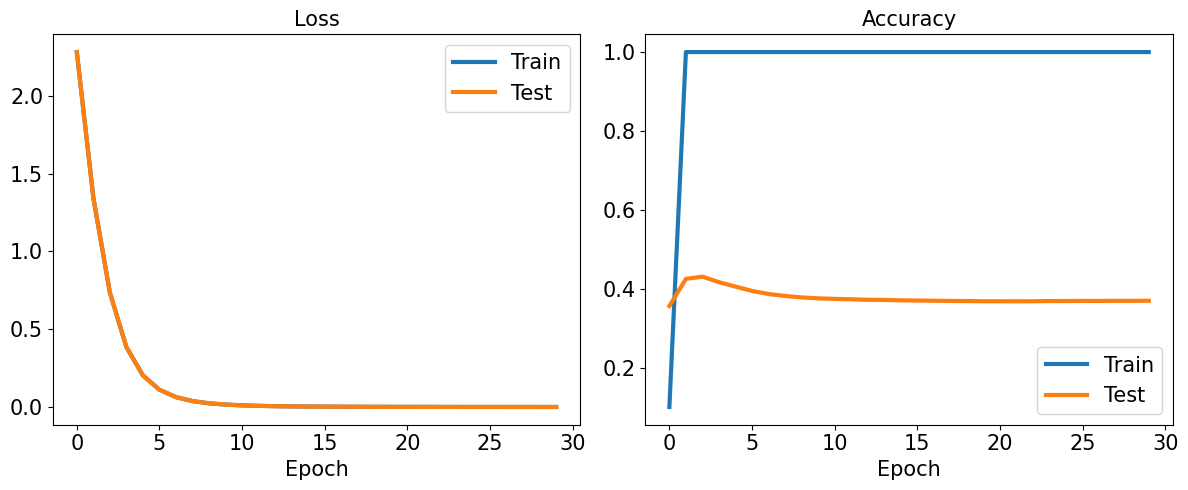

In [54]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3, label='Train')
ax.plot(loss_test_hist, lw=3, label='Test')
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3, label='Train')
ax.plot(accuracy_test_hist, lw=3, label='Test')
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=15)
plt.tight_layout()

plt.show()